In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
from sklearn.decomposition import PCA
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

2022-05-31 20:47:21.377784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/naman/anaconda3/envs/virtual_regression/lib/python3.10/site-packages/cv2/../../lib64:
2022-05-31 20:47:21.378008: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/naman/anaconda3/envs/virtual_regression/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make 

In [109]:
pix = 64

In [110]:
# Imgae Class 1
import glob
import cv2 as cv

path = glob.glob("/home/naman/Dataset6/DYK_CROPPED/*.bmp")
cv_img_1 = []
for img in path:
    n = cv.imread(img)
    n = cv.resize(n, (pix, pix))
    cv_img_1.append(n)
cv_img_1 = np.array(cv_img_1)
#cv_img_1= cv_img_1.reshape(cv_img_1.shape[0], 3, 32,32)
print(cv_img_1.shape)

Y_1 = np.zeros(cv_img_1.shape[0]).reshape(-1,1)
print(Y_1.shape)
print(cv_img_1[0].shape)

(813, 64, 64, 3)
(813, 1)
(64, 64, 3)


In [111]:
path = glob.glob("/home/naman/Dataset6/KOIL_CROPPED/*.bmp")
cv_img_2 = []
for img in path:
    n = cv.imread(img)
    n = cv.resize(n, (pix, pix))
    cv_img_2.append(n)
cv_img_2 = np.array(cv_img_2)
#cv_img_2= cv_img_2.reshape(cv_img_2.shape[0], 3, 32,32)
print(cv_img_2.shape)


Y_2 = 1*np.ones(cv_img_2.shape[0]).reshape(-1,1)
print(Y_2.shape)

(825, 64, 64, 3)
(825, 1)


In [112]:
path = glob.glob("/home/naman/Dataset6/META_CROPPED/*.bmp")
cv_img_3 = []
for img in path:
    n = cv.imread(img)
    n = cv.resize(n, (pix, pix))
    cv_img_3.append(n)
cv_img_3 = np.array(cv_img_3)
#cv_img_3= cv_img_3.reshape(cv_img_3.shape[0], 3, 32,32)
print(cv_img_3.shape)

Y_3 = 2*np.ones(cv_img_3.shape[0]).reshape(-1,1)
print(Y_3.shape)
#print(Y_3)

(793, 64, 64, 3)
(793, 1)


In [113]:
path = glob.glob("/home/naman/Dataset6/PARA_CROPPED/*.bmp")
cv_img_4 = []
for img in path:
    n = cv.imread(img)
    n = cv2.resize(n, (pix, pix))
    cv_img_4.append(n)
cv_img_4 = np.array(cv_img_4)
#cv_img_4= cv_img_4.reshape(cv_img_4.shape[0], 3, 32,32)
print(cv_img_4.shape)


Y_4 = 3*np.ones(cv_img_4.shape[0]).reshape(-1,1)
print(Y_4.shape)
#print(Y_4)

(787, 64, 64, 3)
(787, 1)


In [114]:
path = glob.glob("/home/naman/Dataset6/SUP_CROPPED/*.bmp")
cv_img_5 = []
for img in path:
    n = cv.imread(img)
    n = cv2.resize(n, (pix, pix))
    cv_img_5.append(n)
cv_img_5 = np.array(cv_img_5)
#cv_img_5= cv_img_5.reshape(cv_img_5.shape[0],3, 32,32)
print(cv_img_5.shape)


Y_5 = 4*np.ones(cv_img_5.shape[0]).reshape(-1,1)
print(Y_5.shape)
#print(Y_5)

(831, 64, 64, 3)
(831, 1)


In [115]:
X_data = np.append(cv_img_1, cv_img_2, axis = 0)
X_data = np.append(X_data, cv_img_3, axis = 0)
X_data = np.append(X_data, cv_img_4, axis = 0)
X_data = np.append(X_data, cv_img_5, axis = 0)
#X_data = np.append(X_data, cv_img_6, axis = 0)
#X_data = np.append(X_data, cv_img_7, axis = 0)

Y_data = np.append(Y_1, Y_2, axis = 0)
Y_data = np.append(Y_data, Y_3, axis = 0)
Y_data = np.append(Y_data, Y_4, axis = 0)
Y_data = np.append(Y_data, Y_5, axis = 0)
#Y_data = np.append(Y_data, Y_6, axis = 0)
#Y_data = np.append(Y_data, Y_7, axis = 0)

print(Y_data.shape)
print(X_data.shape)

(4049, 1)
(4049, 64, 64, 3)


In [116]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20)

In [117]:
print(f"x_train: {x_train.shape} - y_train: {y_train.shape}")
print(f"x_test: {x_test.shape} - y_test: {y_test.shape}")

x_train: (3239, 64, 64, 3) - y_train: (3239, 1)
x_test: (810, 64, 64, 3) - y_test: (810, 1)


In [118]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(72, 72),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [119]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

(-0.5, 63.5, 63.5, -0.5)

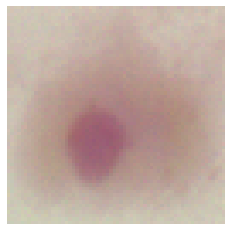

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

In [133]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 200
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [134]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


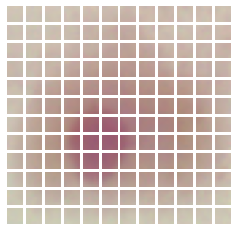

In [135]:
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [136]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [137]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [139]:
num_classes = 100
input_shape = (pix, pix, 3)

In [127]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(2, name="top-2-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_2_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 2 accuracy: {round(top_2_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/100
12/12 [==============================] - 172s 13s/step - loss: 7.2499 - accuracy: 0.3890 - top-2-accuracy: 0.6357 - val_loss: 1.2764 - val_accuracy: 0.6327 - val_top-2-accuracy: 0.8148
Epoch 2/100
12/12 [==============================] - 160s 13s/step - loss: 1.3187 - accuracy: 0.5959 - top-2-accuracy: 0.7962 - val_loss: 0.7147 - val_accuracy: 0.7469 - val_top-2-accuracy: 0.9074
Epoch 3/100
12/12 [==============================] - 159s 13s/step - loss: 0.9720 - accuracy: 0.6624 - top-2-accuracy: 0.8617 - val_loss: 0.6921 - val_accuracy: 0.7191 - val_top-2-accuracy: 0.9074
Epoch 4/100
12/12 [==============================] - 158s 13s/step - loss: 0.8431 - accuracy: 0.6991 - top-2-accuracy: 0.8868 - val_loss: 0.5988 - val_accuracy: 0.8056 - val_top-2-accuracy: 0.9352
Epoch 5/100
12/12 [==============================] - 163s 14s/step - loss: 0.7342 - accuracy: 0.7369 - top-2-accuracy: 0.8943 - val_loss: 0.5124 - val_accuracy: 0.8364 - val_top-2-accuracy: 0.9383
Epoch 6/100
12/

In [128]:
#vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/100
12/12 [==============================] - 172s 13s/step - loss: 0.1838 - accuracy: 0.9499 - top-2-accuracy: 0.9925 - val_loss: 0.2701 - val_accuracy: 0.9383 - val_top-2-accuracy: 0.9907
Epoch 2/100
12/12 [==============================] - 157s 13s/step - loss: 0.0855 - accuracy: 0.9698 - top-2-accuracy: 0.9952 - val_loss: 0.2480 - val_accuracy: 0.9660 - val_top-2-accuracy: 0.9907
Epoch 3/100
10/12 [========================>.....] - ETA: 24s - loss: 0.0879 - accuracy: 0.9750 - top-2-accuracy: 0.9969

KeyboardInterrupt: 

In [21]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(2, name="top-2-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/200
12/12 [==============================] - 71s 5s/step - loss: 5.1676 - accuracy: 0.3945 - top-2-accuracy: 0.6117 - val_loss: 1.0517 - val_accuracy: 0.6389 - val_top-2-accuracy: 0.8086
Epoch 2/200
12/12 [==============================] - 62s 5s/step - loss: 1.1733 - accuracy: 0.6206 - top-2-accuracy: 0.8175 - val_loss: 0.6913 - val_accuracy: 0.7315 - val_top-2-accuracy: 0.8889
Epoch 3/200
12/12 [==============================] - 60s 5s/step - loss: 0.9372 - accuracy: 0.6864 - top-2-accuracy: 0.8662 - val_loss: 0.6268 - val_accuracy: 0.7778 - val_top-2-accuracy: 0.9105
Epoch 4/200
12/12 [==============================] - 61s 5s/step - loss: 0.7755 - accuracy: 0.7448 - top-2-accuracy: 0.8967 - val_loss: 0.4718 - val_accuracy: 0.8241 - val_top-2-accuracy: 0.9599
Epoch 5/200
12/12 [==============================] - 60s 5s/step - loss: 0.6635 - accuracy: 0.7684 - top-2-accuracy: 0.9211 - val_loss: 0.4246 - val_accuracy: 0.8519 - val_top-2-accuracy: 0.9568
Epoch 6/200
12/12 [======

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(2, name="top-2-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_2_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 2 accuracy: {round(top_2_accuracy * 100, 2)}%")

    return history

vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

In [29]:
history = run_experiment(vit_classifier)

Epoch 1/150
23/23 [==============================] - 23s 608ms/step - loss: 0.0649 - accuracy: 0.9784 - top-2-accuracy: 0.9983 - val_loss: 0.2787 - val_accuracy: 0.9506 - val_top-2-accuracy: 0.9907
Epoch 2/150
23/23 [==============================] - 12s 525ms/step - loss: 0.0608 - accuracy: 0.9849 - top-2-accuracy: 0.9979 - val_loss: 0.4750 - val_accuracy: 0.9321 - val_top-2-accuracy: 0.9846
Epoch 3/150
23/23 [==============================] - 12s 526ms/step - loss: 0.0967 - accuracy: 0.9746 - top-2-accuracy: 0.9966 - val_loss: 0.3697 - val_accuracy: 0.9074 - val_top-2-accuracy: 0.9753
Epoch 4/150
23/23 [==============================] - 12s 522ms/step - loss: 0.0638 - accuracy: 0.9791 - top-2-accuracy: 0.9969 - val_loss: 0.2596 - val_accuracy: 0.9321 - val_top-2-accuracy: 0.9815
Epoch 5/150
23/23 [==============================] - 12s 525ms/step - loss: 0.0423 - accuracy: 0.9870 - top-2-accuracy: 0.9990 - val_loss: 0.3433 - val_accuracy: 0.9444 - val_top-2-accuracy: 0.9846
Epoch 6/15

In [30]:
_, accuracy, top_2_accuracy = vit_classifier.evaluate(x_test, y_test)

26/26 [==============================] - 2s 94ms/step - loss: 0.1973 - accuracy: 0.9543 - top-2-accuracy: 0.9901


In [42]:
y_test=y_test-1